# Laboratory work №1
## One-shot perceptron
The perceptron is an algorithm for supervised learning of binary classifiers
(functions that can decide whether an input, represented by a vector of numbers,
belongs to some specific class or not).

In [1]:
from numpy import zeros, genfromtxt, random, r_, linspace, array
import matplotlib.pyplot as plt

Reading data from file and mixing rows.
File data08.csv contains 100 rows.
Choosing first 80 rows for train sample and another 20 rows for test samle. It is equal to random generation of train and test samples in ratio 4:1.

In [2]:
data = genfromtxt('data/data08.csv', delimiter=';')
data = random.permutation(data)

In [3]:
train_data = data[r_[0:80, 0:0]]
test_data = data[r_[0:0,-20:0]]

Teaching perceptron on the thaining sample uning Rosenblatt algorithm.

The perceptron is an algorithm for learning a binary classifier: a function that maps its input $x$
(a real-valued vector) to an output value $f \left( x \right) $ (a single binary value):
$$f \left( x \right) =
\begin{cases}
    1, \qquad if \alpha \cdot x + b < 0, \\
    0, \qquad otherwise,
\end{cases}$$
where $ \alpha $ is a vector of real-valued weights,
$ \alpha \cdot x$ is the dot product $ \sum \limits_{i = 1}^m \alpha_i x_i$,
where $m$ is the number of inputs to the perceptron and $b$ is the bias.
The bias shifts the decision boundary away from the origin and does not depend on any input value.

We have two sets: $X_1, X_2 \in \mathbb{R}^n$.
We should find normal vector $ \alpha \in \mathbb{R}^n$ to the dividing line between two sets, so that
$$ \begin{cases}
    \alpha \cdot x > 0 \qquad \forall x \in X_1, \\
    \alpha \cdot x < 0 \qquad \forall x \in X_2.
\end{cases}$$

Initially determine $ \alpha $ as a zero vector (already with bias bit) and correct it on each iteration:
$$ \begin{cases}
    \alpha \cdot x \leq 0, \\
    x \in X_1
\end{cases} \Rightarrow \alpha += x;
\begin{cases}
    \alpha \cdot x \geq 0, \\
    x \in X_2
 \end{cases} \Rightarrow \alpha -= x.$$

In [4]:
def train(train_data):
    a = zeros(3)
    for _ in range(int(1E3)):
        tmp = a.copy()
        for x, y, cls in train_data:
            row = array([x, y, 1])
            if (cls == 0) and (a.dot(row[:2].tolist() + [1]) <= 0):
                a += row
            if (cls == 1) and (a.dot(row[:2].tolist() + [1]) >= 0):
                a -= row
        if all(a == tmp):
            break
    return a

In [5]:
a = train(train_data)
a /= a.dot(a)
print a

[-0.04829828 -0.04971449  0.05417208]


The normal form of the equation of a straight line on the plane is given by:
$Ax + By + C = 0$, where coefficients are the elements of vector $a$.
$y$ can be found as
$$y = \frac{-C - A \cdot x}{B}$$
Points of different sets are plotted with different colors.

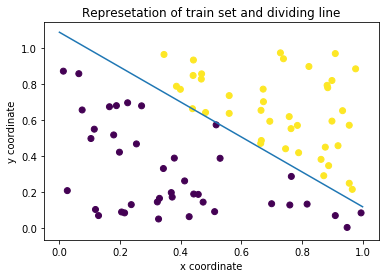

In [6]:
%matplotlib inline
x = [coordinate[0] for coordinate in train_data]
y = [coordinate[1] for coordinate in train_data]
color = [coordinate[2] for coordinate in train_data]
plt.scatter(x, y, c=color)

x_line = linspace(0, 1, 100)
plt.plot(x_line, (-a[2] - a[0] * x_line) / a[1])
plt.xlabel('x coordinate')
plt.ylabel('y coordinate')
plt.title('Represetation of train set and dividing line')

plt.show()

Checking perceptron with test data: plotting line and test points.

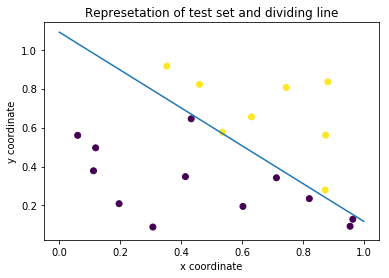

In [7]:
%matplotlib inline
plt.plot(x_line, (-a[2] - a[0] * x_line) / a[1])

x_test = [coordinate[0] for coordinate in test_data]
y_test = [coordinate[1] for coordinate in test_data]
color_test = [coordinate[2] for coordinate in test_data]
plt.scatter(x_test, y_test, c=color_test)
plt.xlabel('x coordinate')
plt.ylabel('y coordinate')
plt.title('Represetation of test set and dividing line')

plt.show()

Finding an error rate of the algorithm: number of vectors is test set for which the algorithm identified not true set divided on the whole number of vectors in test.

In [8]:
def error_rate(test_data):
    mistakes = 0
    for x, y, cls in test_data:
        row = array([x, y, 1])
        if (cls == 0) and (a.dot(row.tolist()) <= 0):
            mistakes += 1
        if (cls == 1) and (a.dot(row.tolist()) >= 0):
            mistakes += 1
    return mistakes * 1. / test_data.shape[0]

In [9]:
print error_rate(test_data)

0.0
